### <font color='blue'>Context</font>

Elizabeth II (Elizabeth Alexandra Mary; 21 April 1926 – 8 September 2022) was Queen of the United Kingdom and other Commonwealth Realms from 6 February 1952 until her death in 2022.

She was queen regnant of 32 different sovereign states over the course of her reign and served as monarch of 15 of them at the time of her death.

His reign of 70 years and 214 days is the longest of any British monarch and the longest recorded reign of any head of state. - Wikipedia

### <font color='blue'>Objective of Analysis</font>

In this analysis we will have 2 datasets containing raw tweets, generated seconds after the announcement of the death of Queen Elizabeth II, the tweets were collected for a period of 2 hours shortly after the announcement of the Queen's Death.

The first dataset *queens_death_tweets.csv* contains *36910* tweets searched with the keyword *Rainha Elizabeth*, and the second dataset *king_charles_tweets.csv* contains *51688* tweets searched with the keyword *King Charles*.

The aim of this analysis is to find out what was the reaction of people in different parts of the world right after the announcement of the death of Queen Elisabeth II.

### <font color='blue'>Description of the Variables Used in the Analysis</font>

* **Date** - the day the tweet was posted.

* **Time** - The time the tweet was posted.

* **username**- The username that posted the tweet.

* **Tweet**- What was posted by the user.

* **Language**- The language used to post the tweet.

* **replies_count**- The total number of replies for the tweet.

* **retweets_count** - The total number of retweets of the tweet.

* **likes_count**- The total number of likes for the tweet.

### <font color='blue'>Importing the libraries that will be used in the analysis</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
import os
from os import path

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import re
stop=set(stopwords.words('english'))
stopt=set(stopwords.words('portuguese'))


## <font color='blue'> step 1: Queens_death_tweets Analisy </font>

In [3]:
queens = pd.read_csv("dados/queens_death_tweets.csv",encoding='utf8')

In [4]:
queens.shape

(36910, 36)

In [5]:
queens.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568054268233654273,1568054268233654273,2022-09-09 01:50:45 UTC,2022-09-09,01:50:45,0,1470288208302772227,sikarwarrr,Kalpanasourabhsingh,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,1568054267025539072,1568054267025539072,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,214331711,cello5150,Cello From Antigua 🇦🇬 #️⃣NSG,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,1568054264467001347,1568054264467001347,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1358234971576688645,mariabisagra,María Bisagra,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1568054263875764225,1568054263875764225,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,831041036,muffinshalo,Muffins Halo,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1568054263712030721,1568054263712030721,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1507459039181033485,thouspectator,spectating_bazinga,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


# Selection of Columns that will be used in the Analysis

In [6]:
queens.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
dfqueen = queens[['date','time','tweet','language','replies_count','retweets_count','likes_count']]

In [8]:
dfqueen.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,01:50:45,RIP..queen Elizabeth..\nBut ab hmara kohinoor ...,en,0,0,0
1,2022-09-09,01:50:44,Queen Elizabeth when she gets to heaven &amp; ...,en,0,0,0
2,2022-09-09,01:50:44,#QueenElizabeth #ReinaIsabel #ElRechazoTeMinti...,qme,0,0,0
3,2022-09-09,01:50:44,Her Majesty the Queen. \nMay your soul reunite...,en,0,0,0
4,2022-09-09,01:50:44,"another day, another thing to spectate. this t...",en,0,0,0


# Defining the correct data types for variables

In [9]:
dfqueen.dtypes

date              object
time              object
tweet             object
language          object
replies_count      int64
retweets_count     int64
likes_count        int64
dtype: object

In [10]:
dfqueen['date'] = pd.to_datetime(dfqueen['date'])
dfqueen['tweet']=dfqueen['tweet'].astype(str)

In [11]:
dfqueen.dtypes

date              datetime64[ns]
time                      object
tweet                     object
language                  object
replies_count              int64
retweets_count             int64
likes_count                int64
dtype: object

# data cleaning

<AxesSubplot:>

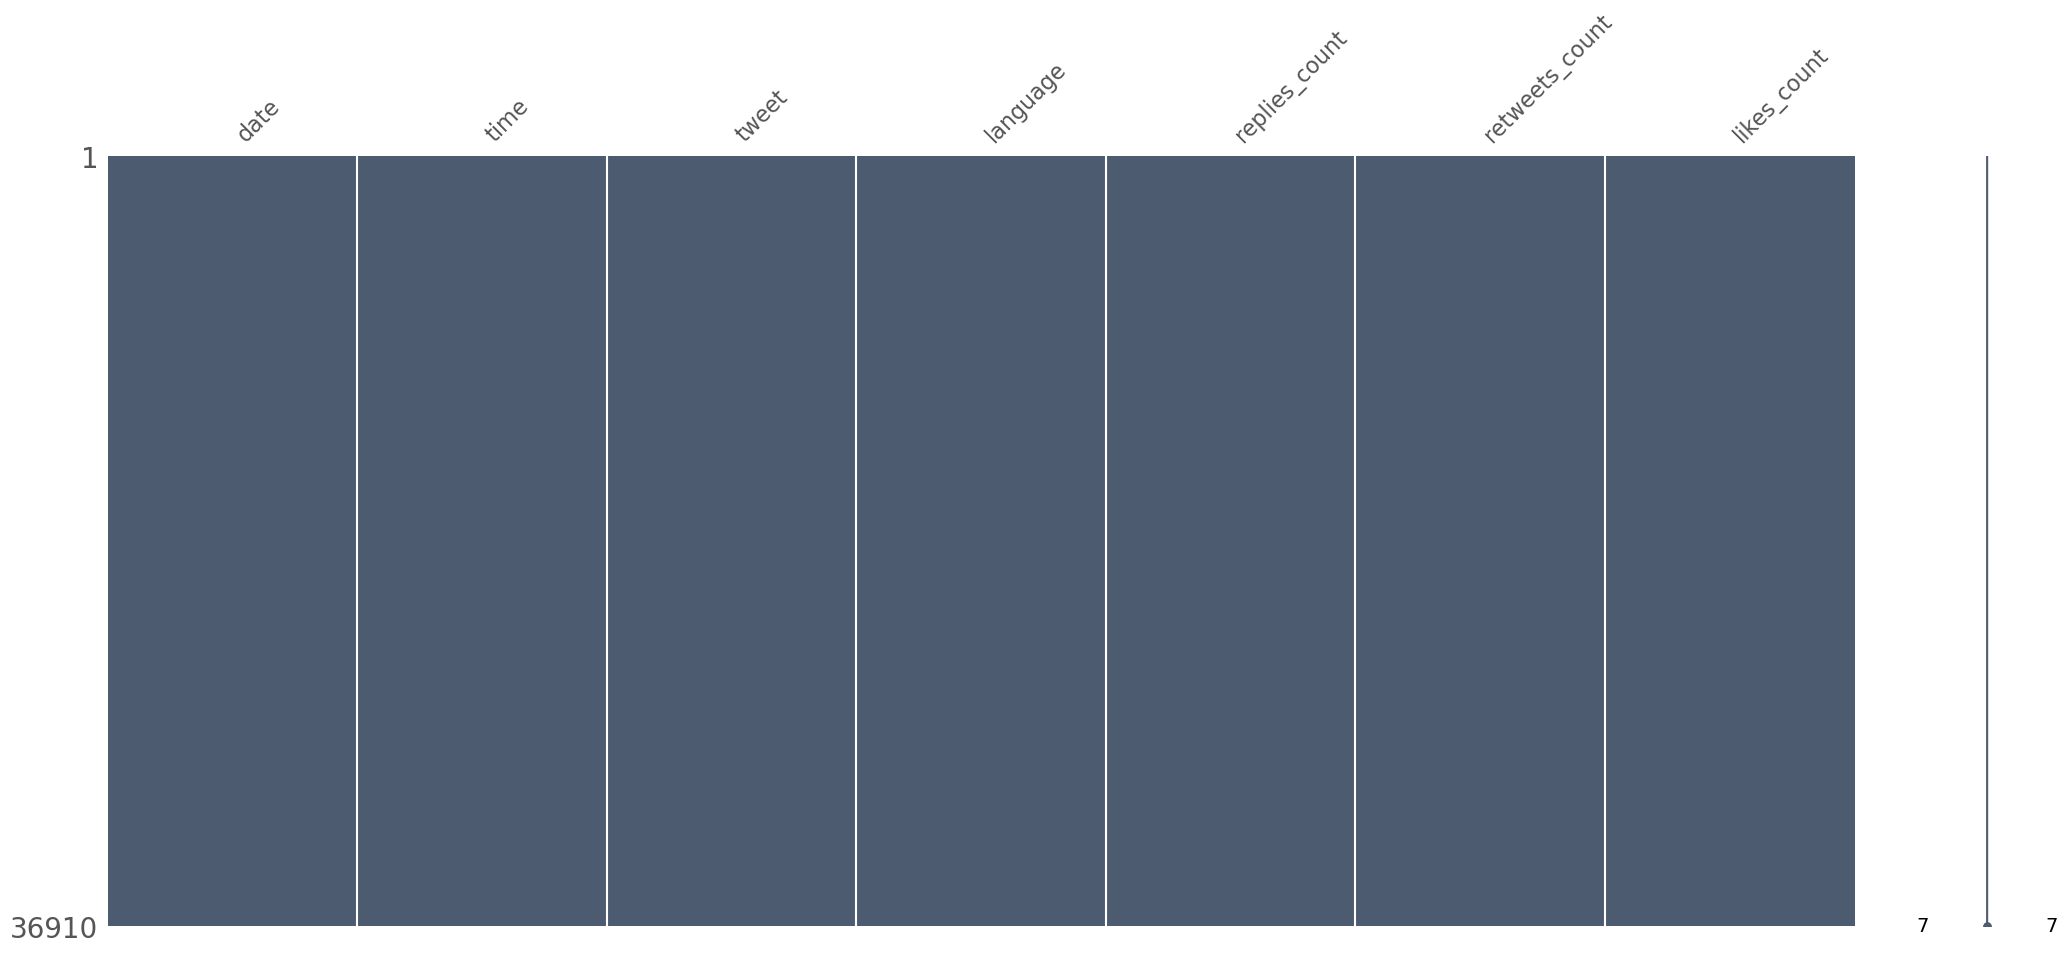

In [12]:
import missingno as msno
msno.matrix(dfqueen,color=(0.3,0.36,0.44))

# <font color='red'> Filtering English Language Tweets </font>

In [13]:
dfqueen['language'].value_counts()

en     29358
es      1682
cy       946
in       871
qme      756
und      557
ja       435
tl       321
pt       295
th       274
qht      234
ar       182
tr       181
fr       149
hi       130
it        79
de        70
zh        53
ta        47
el        31
ht        29
fa        28
fi        22
ca        22
nl        22
ur        17
pl        16
ko        12
et         9
mr         8
ml         6
te         6
ne         6
sl         6
sv         5
zxx        5
gu         4
pa         4
ro         4
eu         4
si         3
ru         3
qam        3
is         2
da         2
or         2
vi         1
my         1
uk         1
lt         1
kn         1
hu         1
bn         1
lv         1
ckb        1
Name: language, dtype: int64

In [14]:
dfqueenEn = dfqueen[(dfqueen.language == 'en')]

In [15]:
dfqueenEn.shape

(29358, 7)

### Filtering out common stopwords in tweets

In [16]:
def create_corpus(target):
    corpus=[]
    
    for x in dfqueen[dfqueen['language']==target ]['tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [17]:
np.array(stop)

array({'your', 'should', 'was', 'why', 'isn', 'they', 'or', 'which', 'do', 'few', 'himself', 'ain', 's', 'a', 'weren', 'myself', 'did', 'not', "don't", "needn't", 'herself', 'its', 'on', 'any', 'through', 'wasn', 'very', 'our', "you'd", 'being', "she's", 'll', 'while', 'but', 'hadn', 'she', 'have', "aren't", "mightn't", 'couldn', "weren't", 'what', 'that', 'more', 'such', "shan't", 'his', 'her', 'same', "that'll", 'y', 'needn', 'both', 'him', 'my', 'an', 'hers', "doesn't", 'in', 'so', 'are', "you've", 't', 'only', 'he', "should've", 'during', "you're", 'haven', 'didn', 'will', 'nor', 'and', 'how', 'ma', 'won', 'been', 'over', "wasn't", 'out', 'yourself', 'me', 'no', "hasn't", "couldn't", 'having', 'below', 'to', 'here', 'aren', 'between', 'doesn', 've', 'of', 'all', 'yourselves', 'whom', 'if', 'i', 'each', 'as', 'under', 'who', "it's", 'after', 'most', 'we', 'hasn', "shouldn't", 'them', 'yours', 'their', 'too', 'where', 'mightn', 'then', 'theirs', "you'll", 'some', "wouldn't", 'off', '

<BarContainer object of 10 artists>

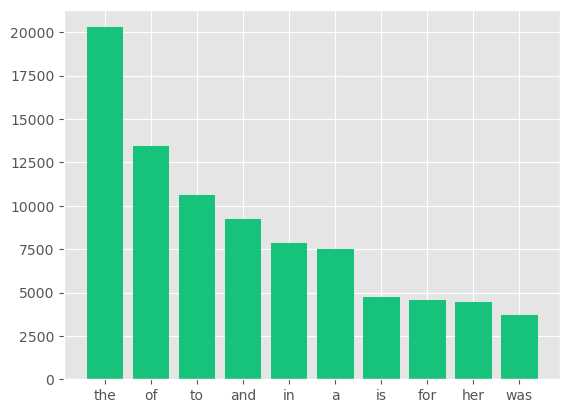

In [18]:
corpus=create_corpus("en")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

## Filtering common scores in tweets

<BarContainer object of 26 artists>

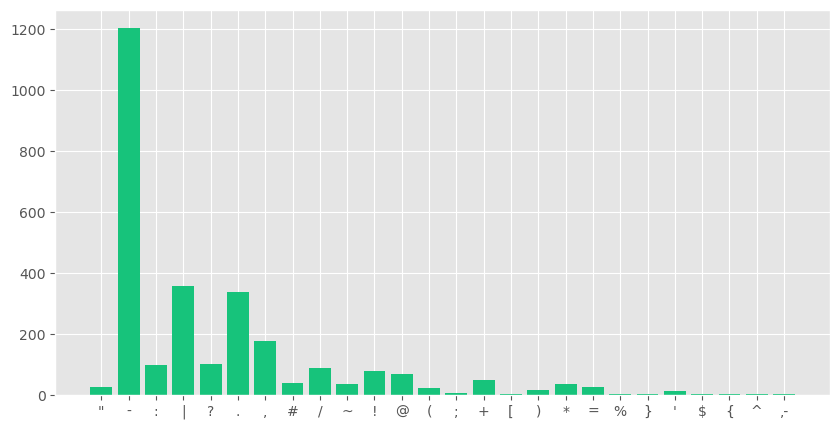

In [19]:
plt.figure(figsize=(10,5))
corpus=create_corpus("en")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

## Filtering common words in tweets

In [20]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

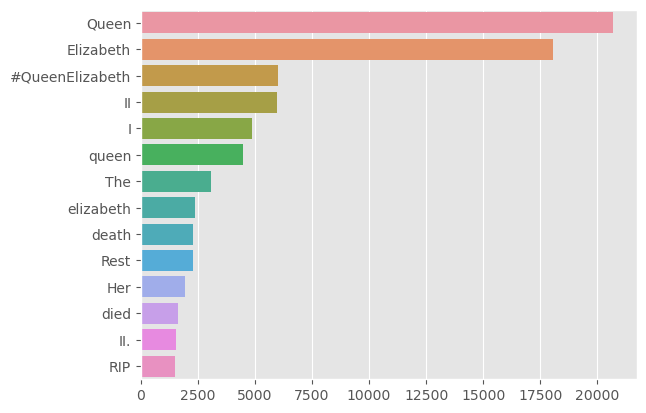

In [21]:
sns.barplot(x=y,y=x)

# Preprocessing and Cleaning

In [22]:
dfqueenEn.columns

Index(['date', 'time', 'tweet', 'language', 'replies_count', 'retweets_count',
       'likes_count'],
      dtype='object')

### Removing URLs and HTML links

In [23]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_html(x))

### Converting tweets to lowercase and removing numbers

In [24]:
def lower(text):
    low_text= text.lower()
    return low_text
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:lower(x))


def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_num(x))

### Removing stopwords and punctuation

In [25]:
#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_stopwords(x))

### Removing Mentions and Hashtags

In [26]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_hash(x))


### Removing whitespace left after removing stopwords, punctuation(….)

In [27]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:remove_space(x))

dfqueenEn = dfqueenEn.drop(columns=['tweet_new'])

### Displaying the Processed Table

In [28]:
dfqueenEn.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,01:50:45,ripqueen elizabeth ab hmara kohinoor dedo quee...,en,0,0,0
1,2022-09-09,01:50:44,queen elizabeth gets heaven amp realizes surro...,en,0,0,0
3,2022-09-09,01:50:44,majesty queen may soul reunite loved today sad...,en,0,0,0
4,2022-09-09,01:50:44,another day another thing spectate time specta...,en,0,0,0
5,2022-09-09,01:50:43,deepestcondolences mourning loss late amp dear...,en,0,0,0


## Words most used by Users

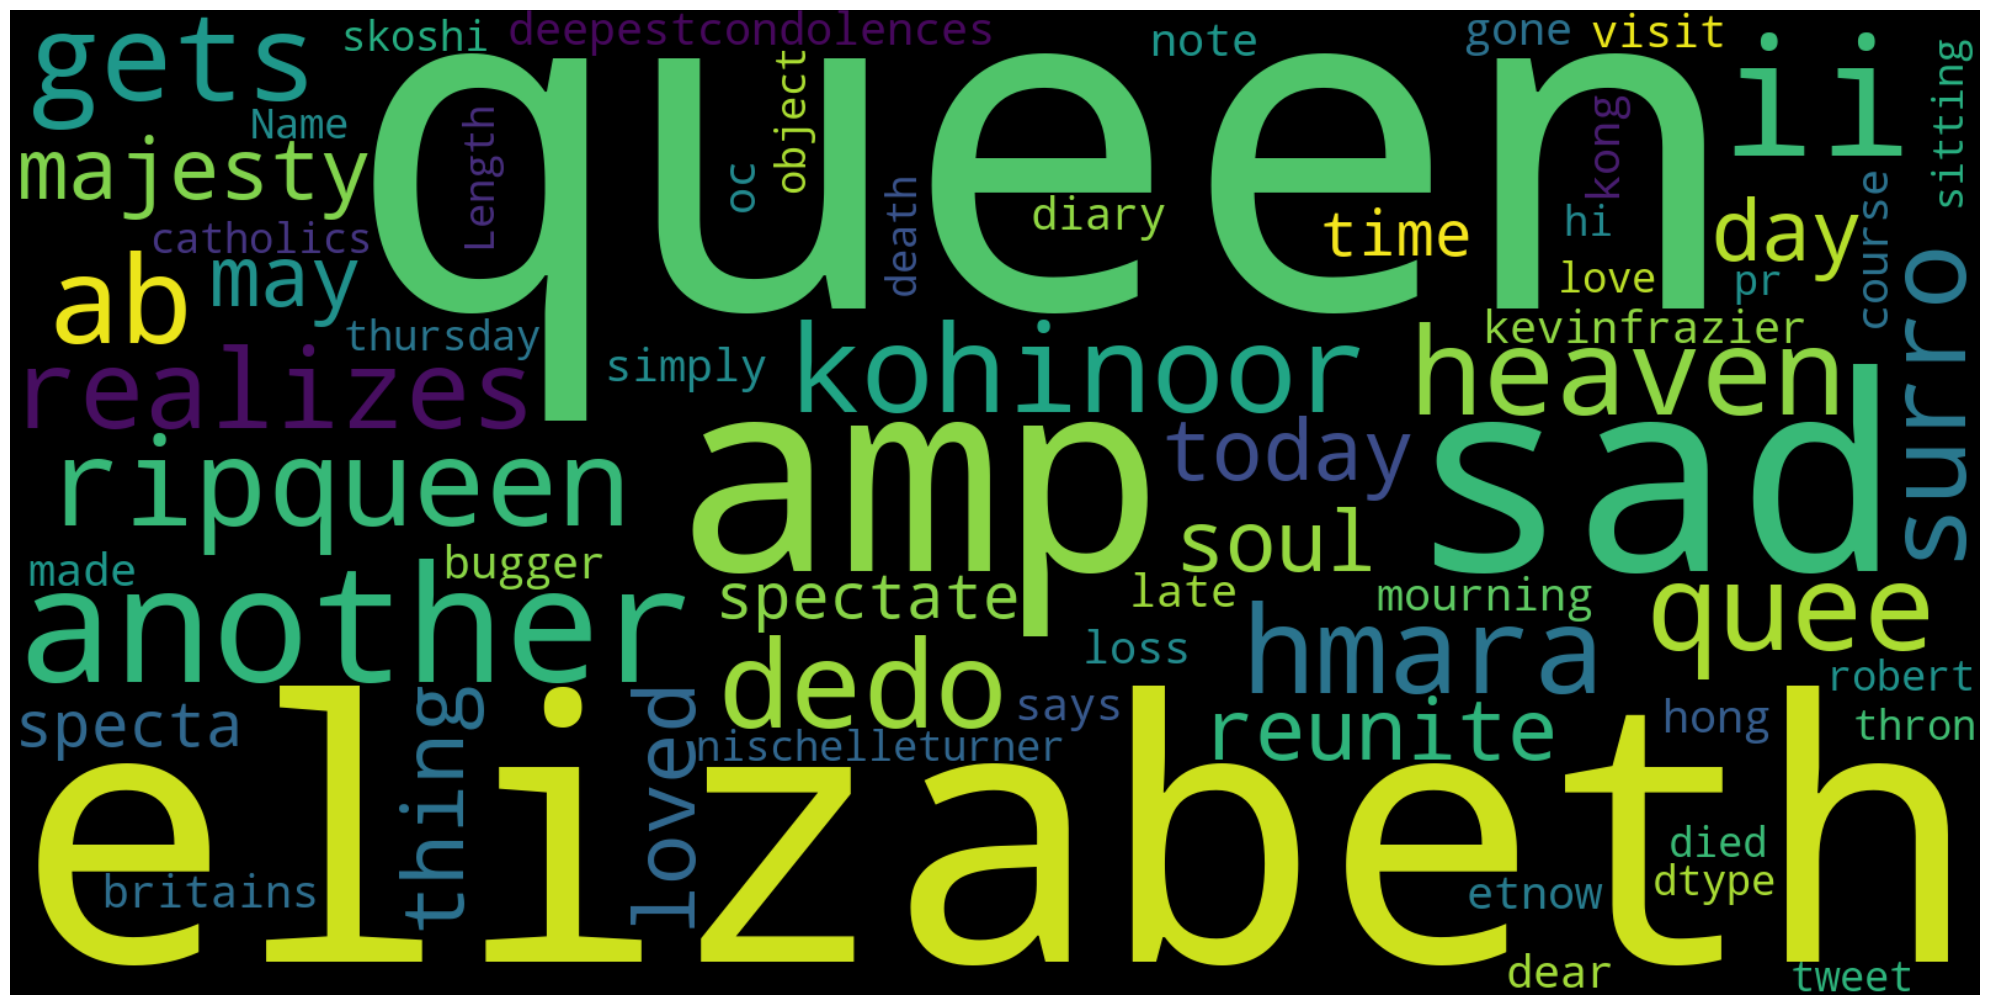

In [29]:
text = str(dfqueenEn['tweet'])
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3 , width = 1600 , height = 800 )
wc.generate(text)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off');
plt.tight_layout()  

## Top 15 Reactions After the Announcement of the Death of Queen Elisabeth II

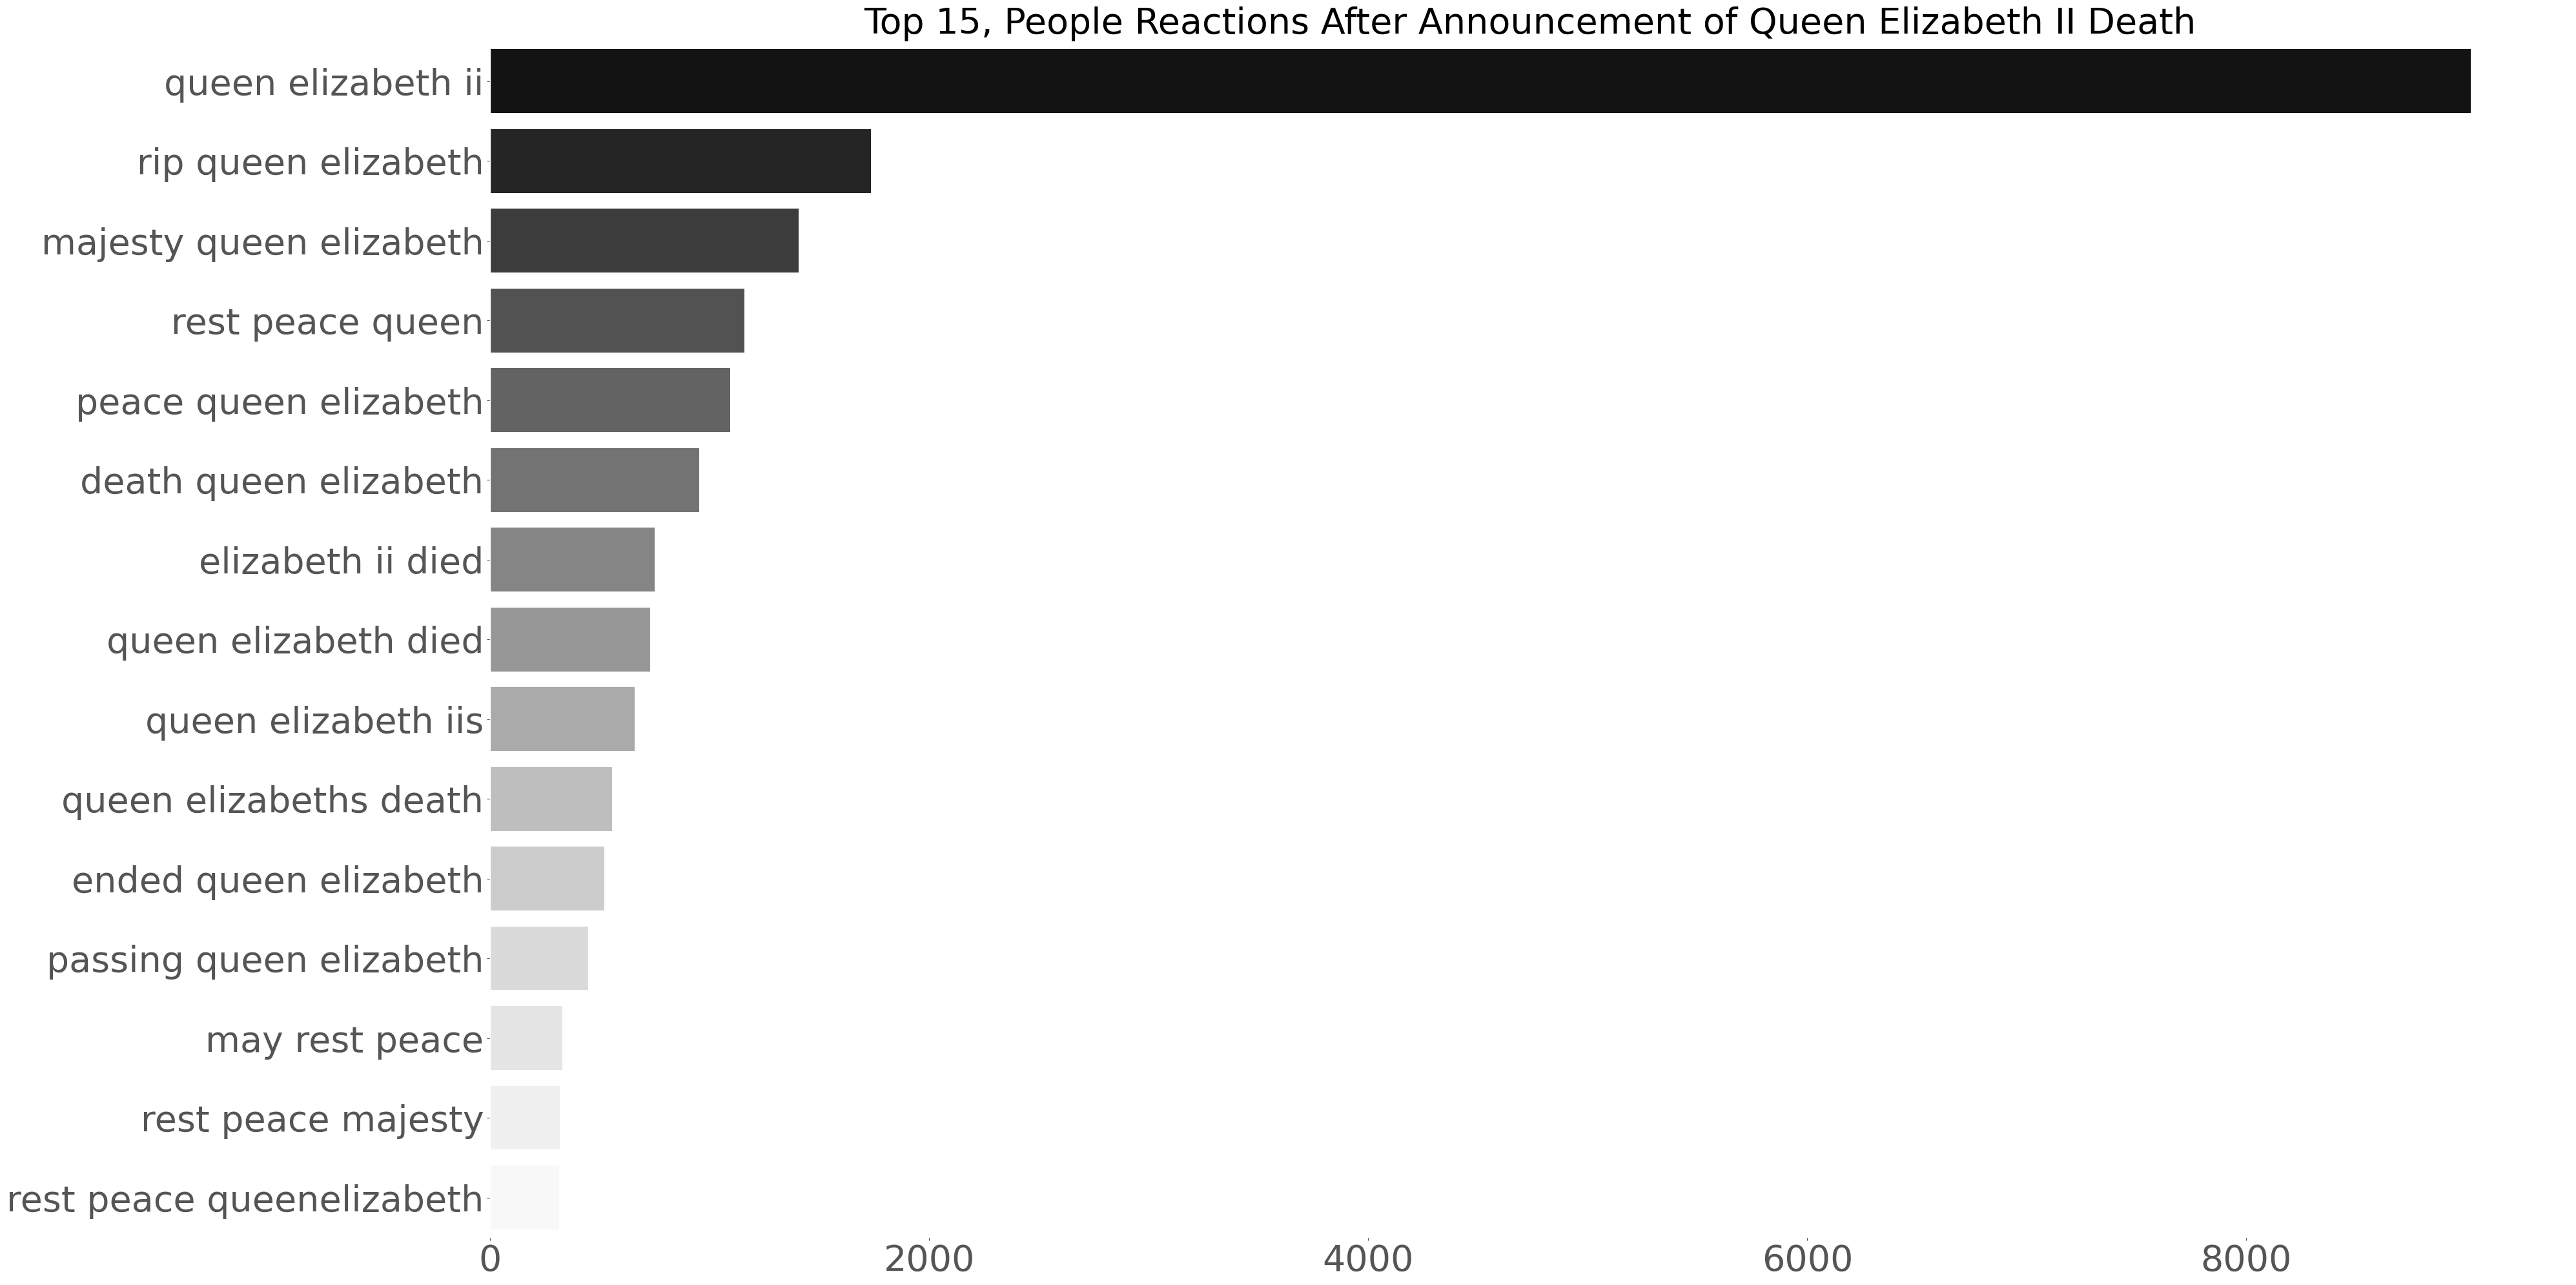

In [30]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 15




sentimento = defaultdict(int)



# Unigrams
for tweet in dfqueenEn['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        sentimento[word] += 1
        

        
df_sentimento = pd.DataFrame(sorted(sentimento.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(figsize=(40, 20))
plt.tight_layout()

sns.barplot(y=df_sentimento[0].values[:N], x=df_sentimento[1].values[:N], palette = 'Greys_r')

axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=40)
axes.tick_params(axis='y', labelsize=40)
axes.set_facecolor('white')

axes.set_title(f'Top {N}, People Reactions After Announcement of Queen Elizabeth II Death', fontsize=40)
plt.tight_layout()

plt.show()

# <font color='blue'> Parte 2: king_charles_tweets Analisys </font>

In [31]:
king = pd.read_csv("dados/king_charles_tweets.csv",encoding='utf8')

In [32]:
queens.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568054268233654273,1568054268233654273,2022-09-09 01:50:45 UTC,2022-09-09,01:50:45,0,1470288208302772227,sikarwarrr,Kalpanasourabhsingh,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,1568054267025539072,1568054267025539072,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,214331711,cello5150,Cello From Antigua 🇦🇬 #️⃣NSG,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,1568054264467001347,1568054264467001347,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1358234971576688645,mariabisagra,María Bisagra,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1568054263875764225,1568054263875764225,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,831041036,muffinshalo,Muffins Halo,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1568054263712030721,1568054263712030721,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1507459039181033485,thouspectator,spectating_bazinga,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


## Selection of Columns that will be used in the Analysis

In [33]:
king.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [34]:
dfking = king[['date','time','tweet','language','replies_count','retweets_count','likes_count']]

In [35]:
dfking.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,02:57:51,@andylines God supports the ascension of King ...,en,0,0,0
1,2022-09-09,02:57:49,"[9-9-2022] 英女王伊利沙伯二世逝世 享年96歲… 查理斯繼位, 成為英王查理斯三世...",ja,0,0,0
2,2022-09-09,02:57:36,King Charles III ni kalau ikutkan laporan medi...,in,0,0,0
3,2022-09-09,02:57:36,It is funny to think how the UK tabloids keep ...,en,1,0,0
4,2022-09-09,02:57:32,"Based on the Led Zeppelin Scale, King Charles ...",en,0,1,0


## Defining correct data types for variables

In [36]:
dfking.dtypes

date              object
time              object
tweet             object
language          object
replies_count      int64
retweets_count     int64
likes_count        int64
dtype: object

In [37]:
dfking['date'] = pd.to_datetime(dfking['date'])
dfking['tweet']=dfking['tweet'].astype(str)

In [38]:
dfking.dtypes

date              datetime64[ns]
time                      object
tweet                     object
language                  object
replies_count              int64
retweets_count             int64
likes_count                int64
dtype: object

## Data cleaning

<AxesSubplot:>

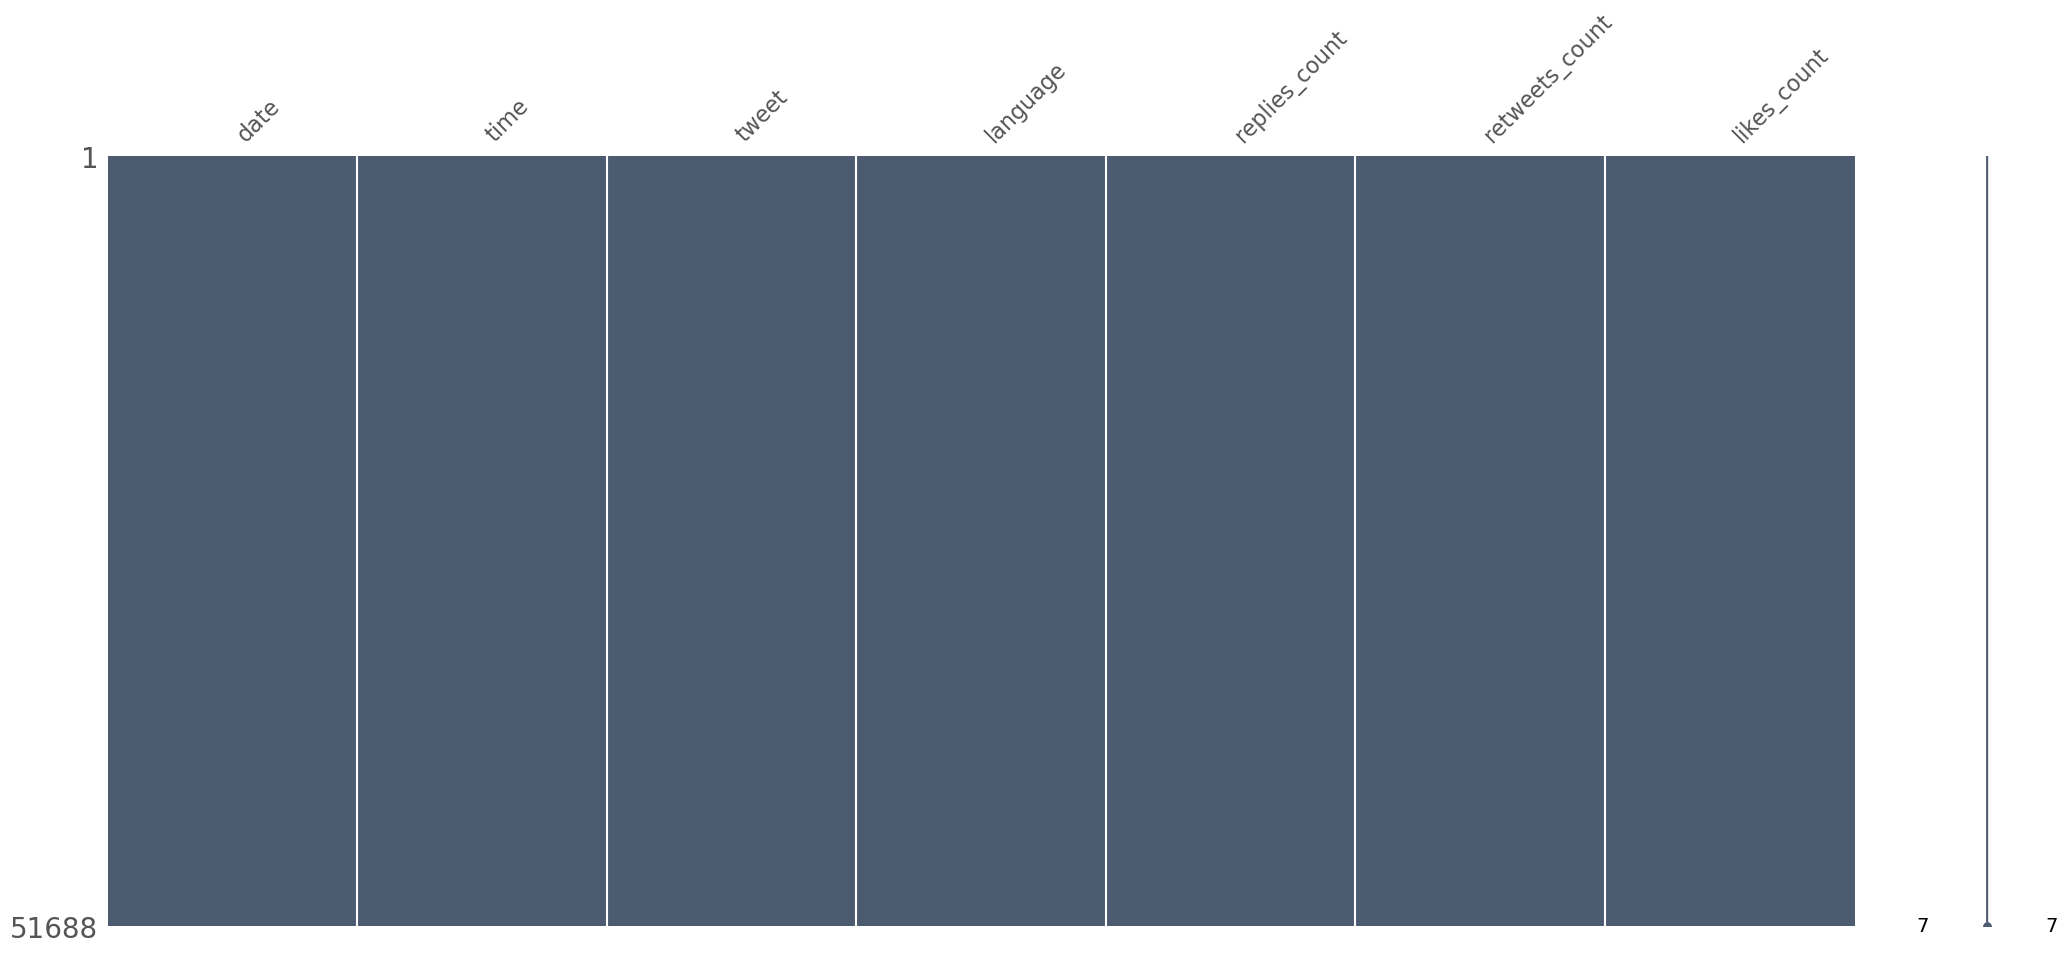

In [39]:
import missingno as msno
msno.matrix(dfking,color=(0.3,0.36,0.44))

# <font color='red'> Filtering English Language Tweets </font>

In [40]:
dfkingEn = dfking[(dfking.language == 'en')]

In [41]:
dfkingEn.shape

(47500, 7)

## Filtering irrelevant but common words in tweets

In [42]:
def create_corpusKing(target):
    corpus=[]
    
    for x in dfking[dfking['language']==target ]['tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [43]:
np.array(stop)

array({'your', 'should', 'was', 'why', 'isn', 'they', 'or', 'which', 'do', 'few', 'himself', 'ain', 's', 'a', 'weren', 'myself', 'did', 'not', "don't", "needn't", 'herself', 'its', 'on', 'any', 'through', 'wasn', 'very', 'our', "you'd", 'being', "she's", 'll', 'while', 'but', 'hadn', 'she', 'have', "aren't", "mightn't", 'couldn', "weren't", 'what', 'that', 'more', 'such', "shan't", 'his', 'her', 'same', "that'll", 'y', 'needn', 'both', 'him', 'my', 'an', 'hers', "doesn't", 'in', 'so', 'are', "you've", 't', 'only', 'he', "should've", 'during', "you're", 'haven', 'didn', 'will', 'nor', 'and', 'how', 'ma', 'won', 'been', 'over', "wasn't", 'out', 'yourself', 'me', 'no', "hasn't", "couldn't", 'having', 'below', 'to', 'here', 'aren', 'between', 'doesn', 've', 'of', 'all', 'yourselves', 'whom', 'if', 'i', 'each', 'as', 'under', 'who', "it's", 'after', 'most', 'we', 'hasn', "shouldn't", 'them', 'yours', 'their', 'too', 'where', 'mightn', 'then', 'theirs', "you'll", 'some', "wouldn't", 'off', '

<BarContainer object of 10 artists>

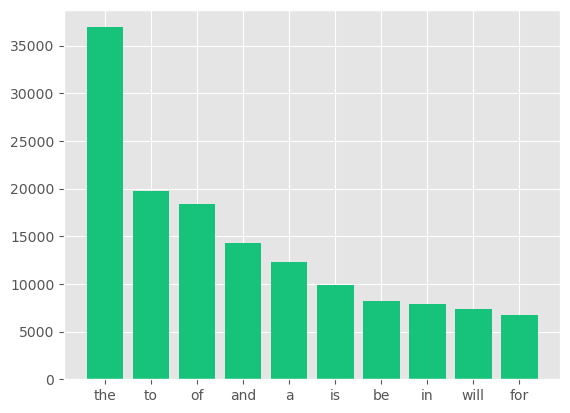

In [44]:
corpusKing=create_corpusKing("en")

dic=defaultdict(int)
for word in corpusKing:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

## Filtering the most common scores in tweets

<BarContainer object of 26 artists>

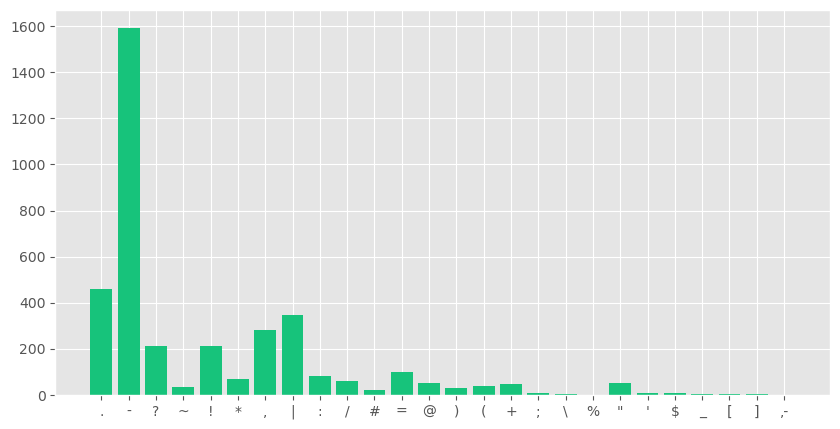

In [45]:
plt.figure(figsize=(10,5))
corpusKing=create_corpusKing("en")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpusKing):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

## Filtering the most common words in tweets

In [46]:
counter=Counter(corpusKing)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

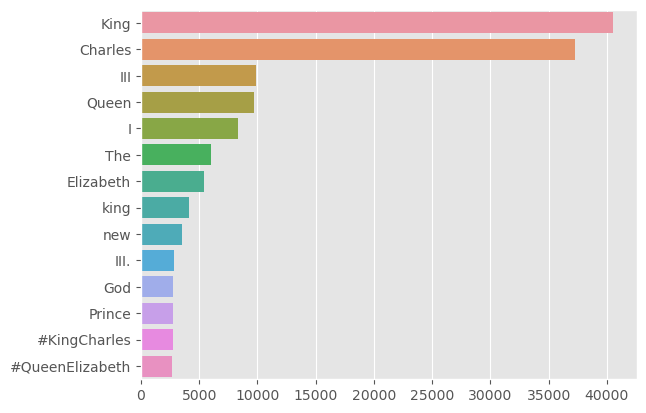

In [47]:
sns.barplot(x=y,y=x)

# Preprocessing and Cleaning

### Removing URLs and HTML links

In [48]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_html(x))

### Converting tweets to lowercase and removing numbers

In [49]:
def lower(text):
    low_text= text.lower()
    return low_text
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:lower(x))



def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_num(x))

### Removing stopwords and punctuation

In [50]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_stopwords(x))

### Removing Mentions and Hashtags

In [51]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_hash(x))

### Removing whitespace left after removing stopwords, punctuation(….)

In [52]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:remove_space(x))

dfkingEn = dfkingEn.drop(columns=['tweet_new'])

### Displaying the Processed Table

In [53]:
dfkingEn.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,02:57:51,andylines god supports ascension king charles ...,en,0,0,0
3,2022-09-09,02:57:36,funny think uk tabloids keep repeating prince ...,en,1,0,0
4,2022-09-09,02:57:32,based led zeppelin scale king charles iii folk...,en,0,1,0
5,2022-09-09,02:57:29,theroyalbutler king charles ii alright,en,0,0,0
6,2022-09-09,02:57:29,king charles iii gotten know well great wonder...,en,0,0,0


## Words most used by Users

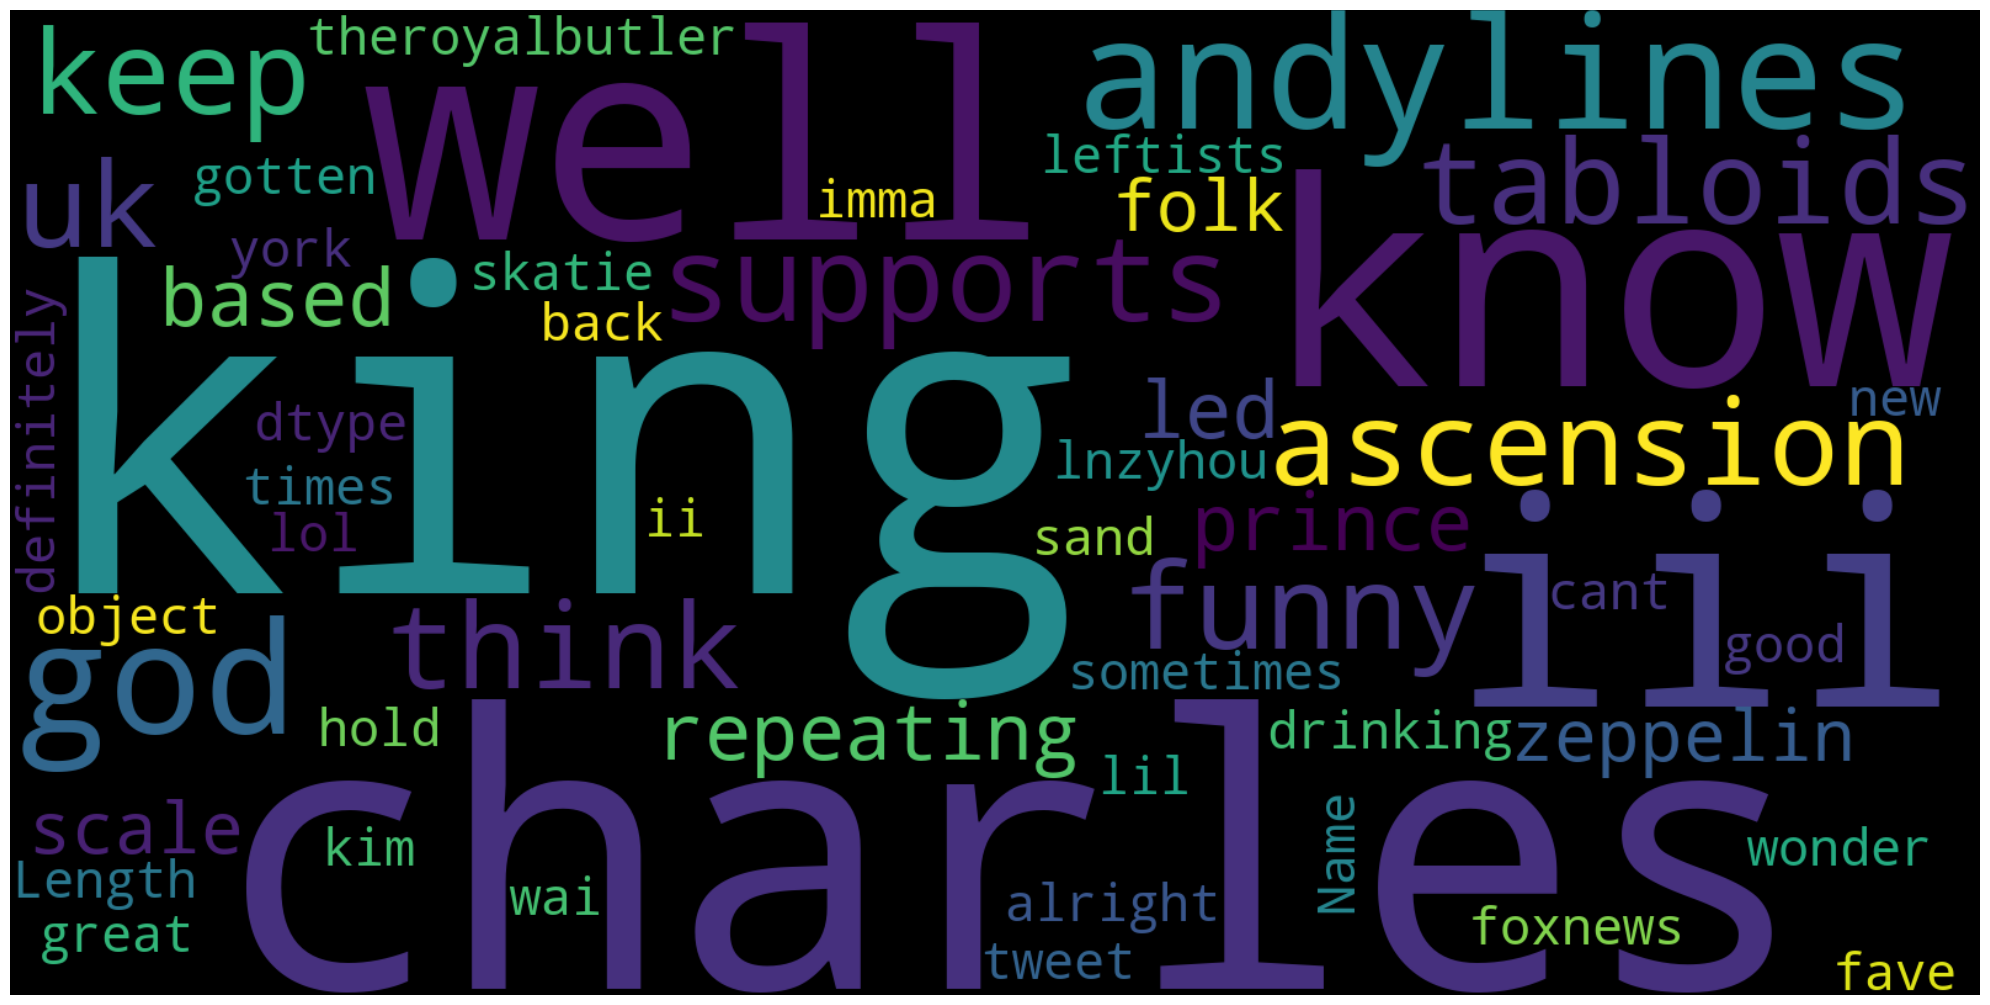

In [54]:
text = str(dfkingEn['tweet'])
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3, width = 1600 , height = 800 )
wc.generate(text)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off');
plt.tight_layout()  

## Top 15 Reactions After the Announcement of the Death of Queen Elisabeth II

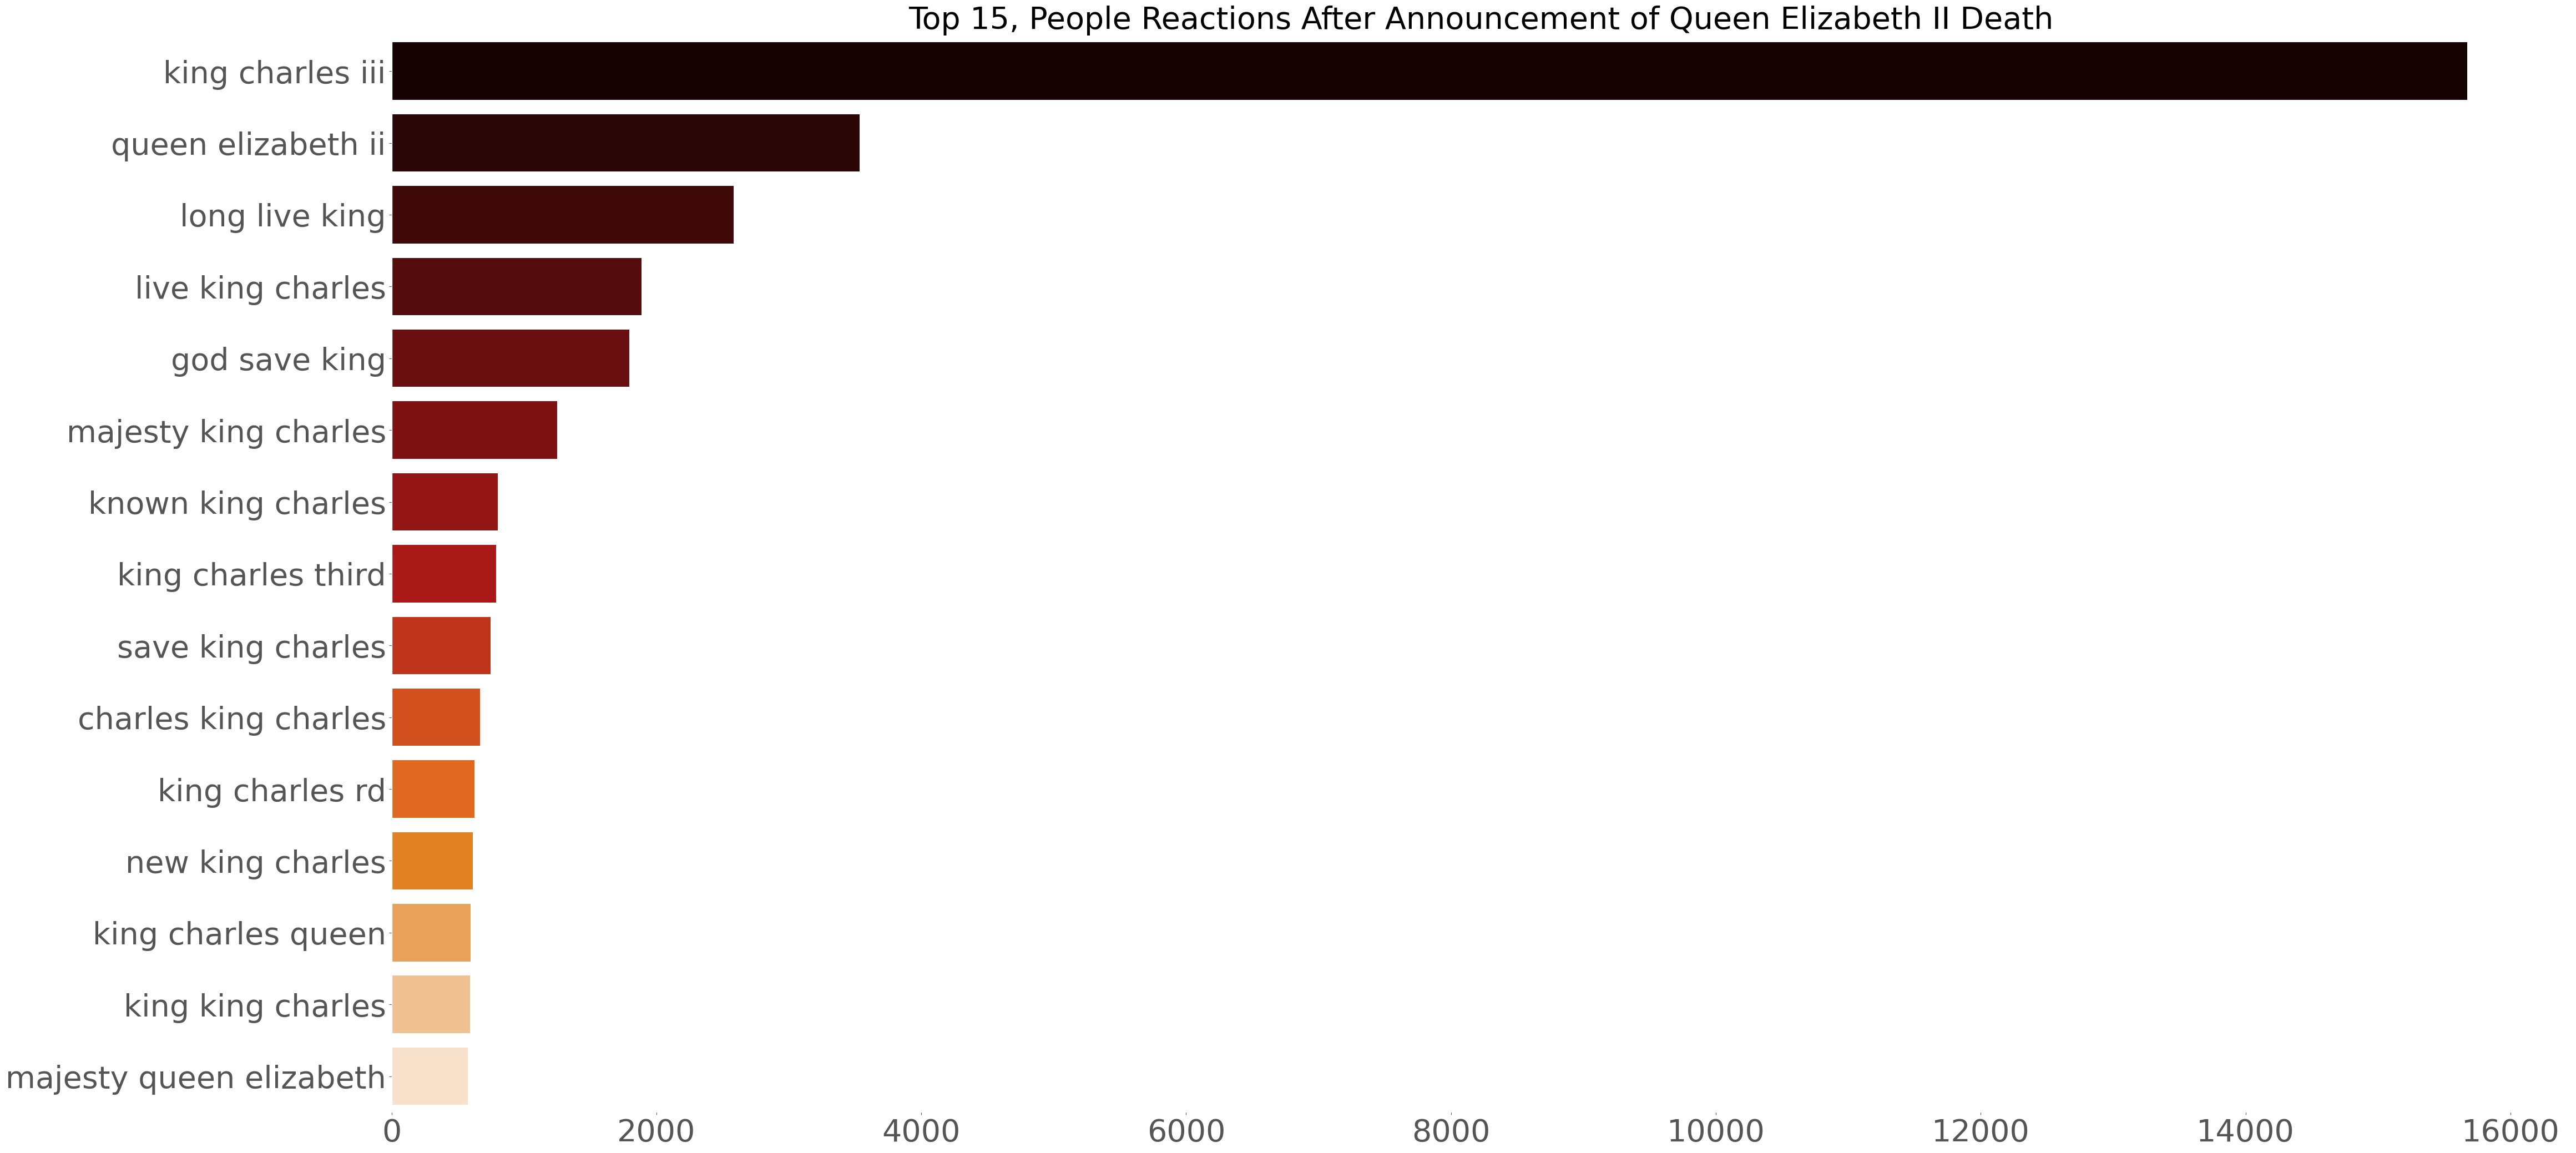

In [55]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 15




sentimento = defaultdict(int)



# Unigrams
for tweet in dfkingEn['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        sentimento[word] += 1
        

        
df_sentimento = pd.DataFrame(sorted(sentimento.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(figsize=(40, 20))
plt.tight_layout()

sns.barplot(y=df_sentimento[0].values[:N], x=df_sentimento[1].values[:N], palette = 'gist_heat')


axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=40)
axes.tick_params(axis='y', labelsize=40)
axes.set_facecolor('white')
axes.set_title(f'Top {N}, People Reactions After Announcement of Queen Elizabeth II Death', fontsize=40)


plt.show()